In [42]:
import re
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
import stopwords
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
# spacy.load('en_core_web_sm')


[nltk_data] Downloading package punkt to /home/mateusz/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
df =  pd.read_csv("./IMDB_Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [33]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [34]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [35]:
df["sentiment"] = df["sentiment"].map({"positive": 1, "negative":0})
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [36]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    text_without_tags = soup.get_text(separator=' ')
    return text_without_tags

df["review"] = df["review"].apply(lambda x: remove_html_tags(x))
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming te...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [37]:
def remove_contractions(text):
    # This solution is copied from an answer to a stackoverflow question:
    # https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python

    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)

    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

df["review"] = df["review"].apply(lambda x: remove_contractions(x))
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming te...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there is a family where a little boy...,0
4,"Petter Mattei is ""Love in the Time of Money"" i...",1


In [38]:
def remove_punctuation(text):
    text_list_without_punctuation = [letter for letter in text if letter not in string.punctuation]
    text_without_punctuation = ''.join(text_list_without_punctuation)
    return text_without_punctuation

df["review"] = df["review"].apply(lambda x: remove_punctuation(x))
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there is a family where a little boy...,0
4,Petter Mattei is Love in the Time of Money is ...,1


In [39]:
def remove_whitespace(text):
    pattern = re.compile(r'\s+')
    text_without_whitespace = re.sub(pattern, ' ', text)
    return text_without_whitespace

df["review"] = df["review"].apply(lambda x: remove_whitespace(x))
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production The filming tech...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there is a family where a little boy...,0
4,Petter Mattei is Love in the Time of Money is ...,1


In [40]:
def text_to_lower(text):
    return text.lower()

df["review"] = df["review"].apply(lambda x: text_to_lower(x))
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there is a family where a little boy...,0
4,petter mattei is love in the time of money is ...,1


In [43]:
stoplist = stopwords.get_stopwords("english")
stoplist = set(stoplist)

def remove_stopwords(text):
    no_stopwords_list = [word for word in word_tokenize(text) if word not in stoplist]
    no_stopwords_text = " ".join(no_stopwords_list)
    return no_stopwords_text

df["review"] = df["review"].apply(lambda x: remove_stopwords(x))
df.head()

,review,sentiment
0,one reviewers mentioned watching just 1 oz epi...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake thinks zombie...,0
4,petter mattei love time money visually stunnin...,1


In [44]:
sentences = df["review"]
positive_reviews = ' '.join(sentences[df["sentiment"] == 1])
negative_reviews = ' '.join(sentences[df["sentiment"] == 0])

positive_wordcloud = WordCloud(width=800, height=800, background_color="black",
                               min_font_size=12).generate(positive_reviews)

negative_wordcloud = WordCloud(width=800, height=800, background_color="black",
                               min_font_size=12).generate(negative_reviews)

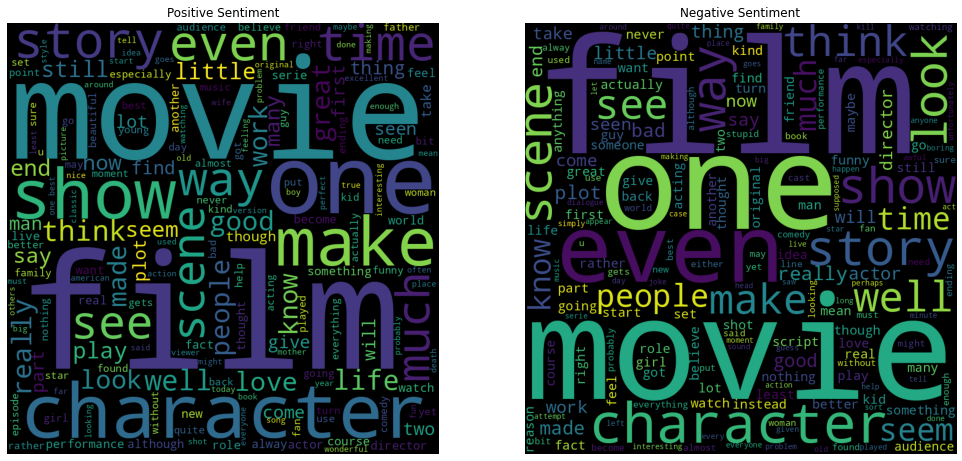

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
ax[0].imshow(positive_wordcloud)
ax[0].set_title("Positive Sentiment")
ax[0].axis("off")
ax[1].imshow(negative_wordcloud)
ax[1].set_title("Negative Sentiment")
ax[1].axis("off");

In [ ]:
# TODO maybe add lemmatization?